# Semester Project Jupyter Notebook File

In [2]:
## imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import numpy    
import cv2
import os

## Data Pre-proccessing and Visualization

### Read in Data

In [3]:
print("Curr directory: " + os.getcwd())

## read in data
data = pd.read_csv("..\data\HAM10000_metadata.csv")
print(data.head(10))

## drop uneeded id
data.drop('lesion_id', axis=1, inplace=True)

Curr directory: c:\Users\jobo9\Desktop\class\ml class\sem proj\code
     lesion_id      image_id   dx dx_type   age     sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back


### Plot data

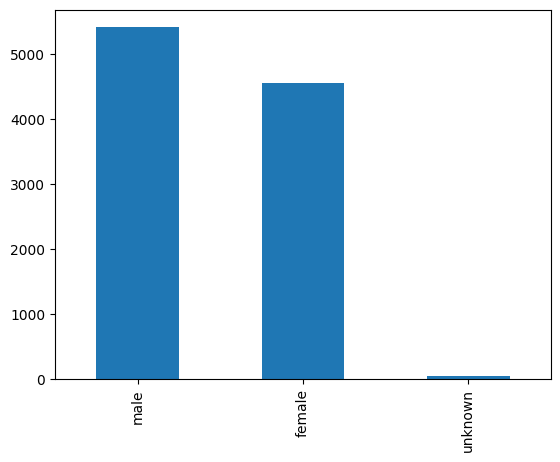

In [4]:
# sex
data.sex.value_counts().plot(kind='bar')               ## shows unknowm col ---> edit these to be null 
plt.show()

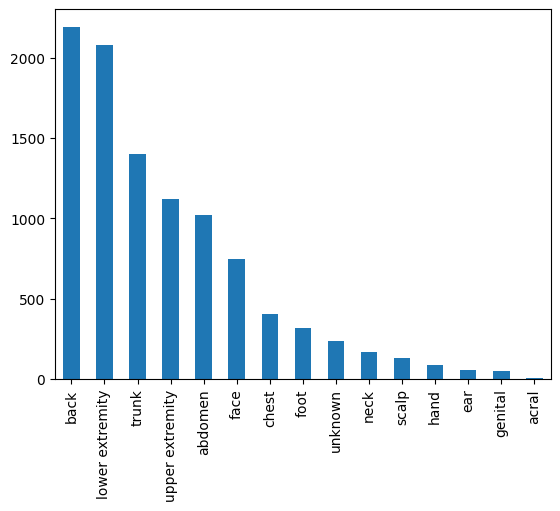

In [5]:
## area
data.localization.value_counts().plot(kind='bar')      ## shows unknowm col ---> edit these to be null
plt.show()

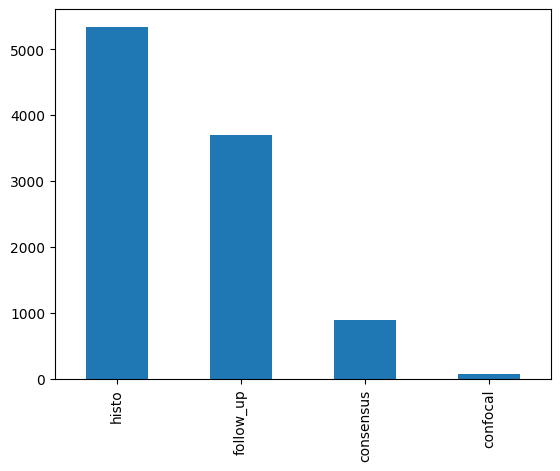

In [6]:
## dx_type
data.dx_type.value_counts().plot(kind='bar')
plt.show()

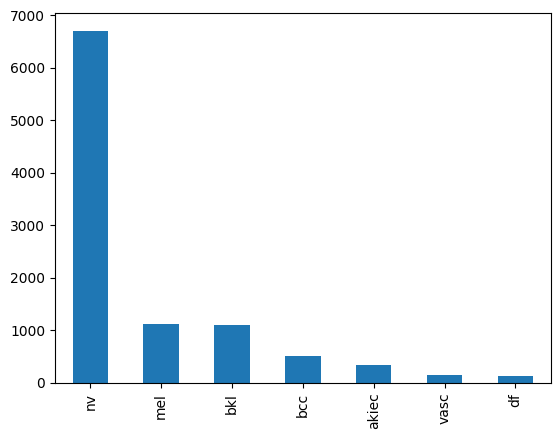

In [7]:
## dx_type
data.dx.value_counts().plot(kind='bar')
plt.show()

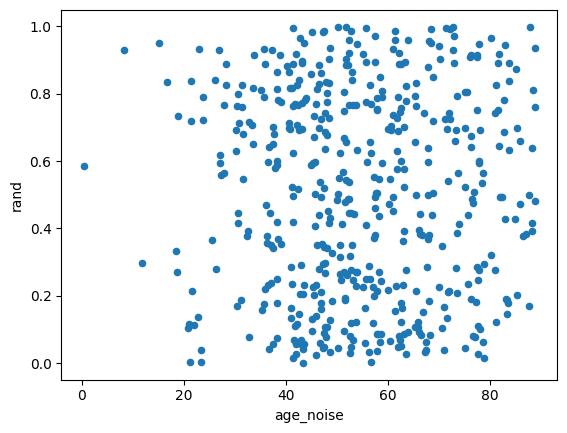

In [8]:
## age
sampleData = data.sample(500) 
## inserts 2 cols,   1: is rand cnt nums between 0 and 1 while the other puts spread in age so points arent 
## stacked right on top of each other
sampleData.insert(6, "rand", numpy.random.rand(500), True) 
sampleData['age_noise'] = sampleData.apply(lambda row: row['age'] + (4 * numpy.random.rand()), axis=1)
sampleData.plot.scatter(x= 'age_noise', y= 'rand')   
plt.show()

### Change 'unknown' to null values

In [9]:
data.loc[data['localization'] == "unknown"]
data.loc[(data.localization == 'unknown'),'localization']= None
data[data['localization'].isnull()].head(10)

,image_id,dx,dx_type,age,sex,localization
50,ISIC_0030105,bkl,histo,80.0,female,None
56,ISIC_0027960,bkl,histo,75.0,male,None
57,ISIC_0026955,bkl,histo,75.0,male,None
140,ISIC_0029683,bkl,histo,65.0,male,None
461,ISIC_0031819,bkl,histo,50.0,male,None
511,ISIC_0029897,bkl,histo,80.0,female,None
535,ISIC_0029139,bkl,histo,60.0,male,None
821,ISIC_0031528,bkl,confocal,40.0,male,None
822,ISIC_0028615,bkl,confocal,40.0,male,None
967,ISIC_0034151,bkl,consensus,60.0,male,None


In [11]:
data.loc[data['sex'] == "unknown"]
data.loc[(data.sex == 'unknown'),'sex']= None   
data[data['sex'].isnull()].head(10)

,image_id,dx,dx_type,age,sex,localization
968,ISIC_0033391,bkl,consensus,NaN,None,None
969,ISIC_0033750,bkl,consensus,NaN,None,None
970,ISIC_0033685,bkl,consensus,NaN,None,None
971,ISIC_0033631,bkl,consensus,NaN,None,None
972,ISIC_0033490,bkl,consensus,NaN,None,None
973,ISIC_0034283,bkl,consensus,NaN,None,None
974,ISIC_0032740,bkl,consensus,NaN,None,None
975,ISIC_0034186,bkl,consensus,NaN,None,None
977,ISIC_0034252,bkl,consensus,NaN,None,None
978,ISIC_0033829,bkl,consensus,NaN,None,None


### Missing Values

<AxesSubplot:>

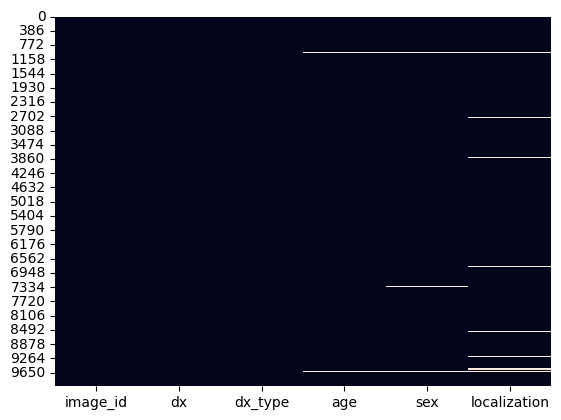

In [11]:
## shows where values are missing 
sns.heatmap(data.isnull(), cbar= False)

<AxesSubplot:>

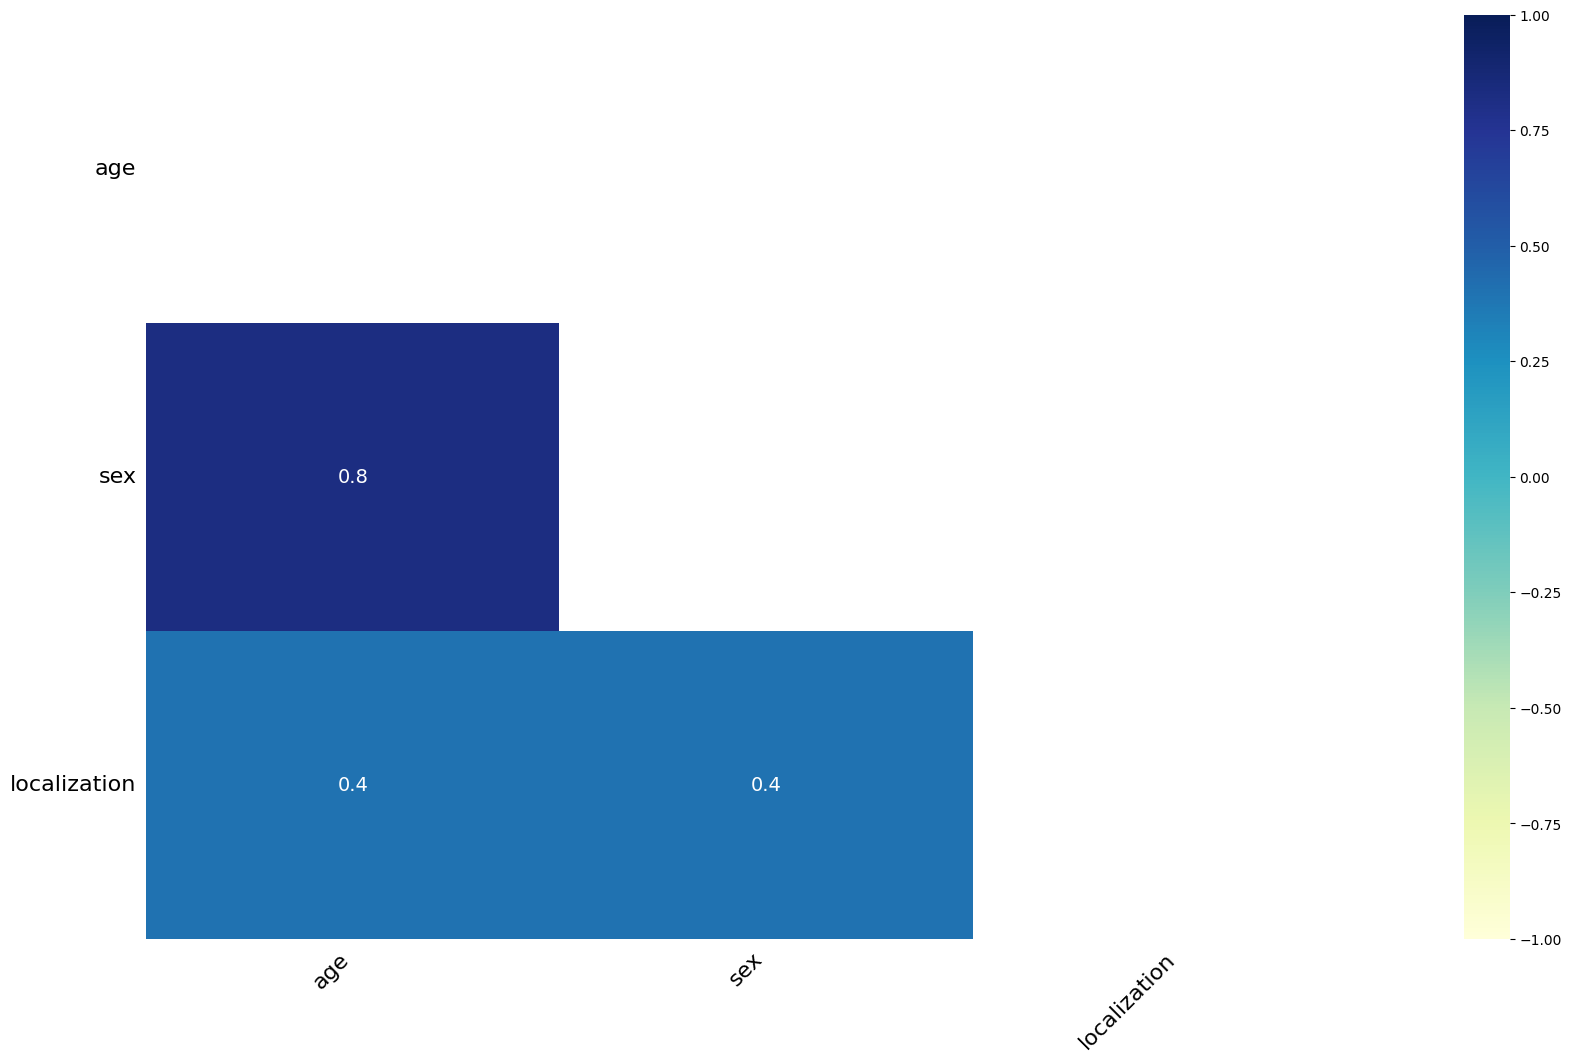

In [12]:
## shows missing value association 
msno.heatmap(data, cmap='YlGnBu')
## -1 means if one column(variable) is present, the other is almost certainly absent (AKA: strong negative correlation, or yellow color)
## 0 means there is no dependence between the columns(variables)
## 1 means if one column(variable) is present, the other is also certainly present(AKA: strong positive correlation, or blue color)

### Data Imputation

In [13]:
## note from leal
##  order does not matter
##  try using a function more similar to the r hw function if models don't do well

##  MAR can be assumed with our data

imputedData = data

imputedData['age'] = data['age'].interpolate()
imputedData['sex'] = data['sex'].interpolate()
imputedData['localization'] = data['localization'].interpolate()

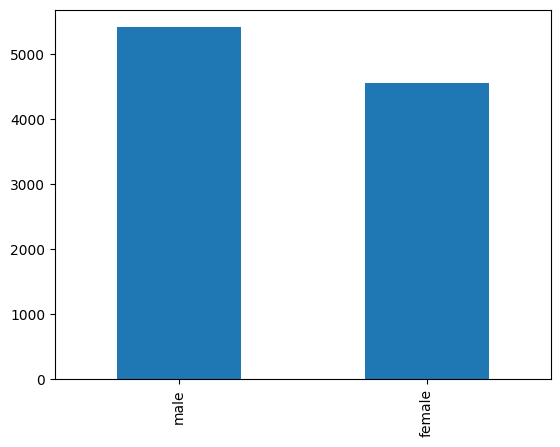

In [14]:
 ## sex
imputedData.sex.value_counts().plot(kind='bar')              ## note that plt 
plt.show()

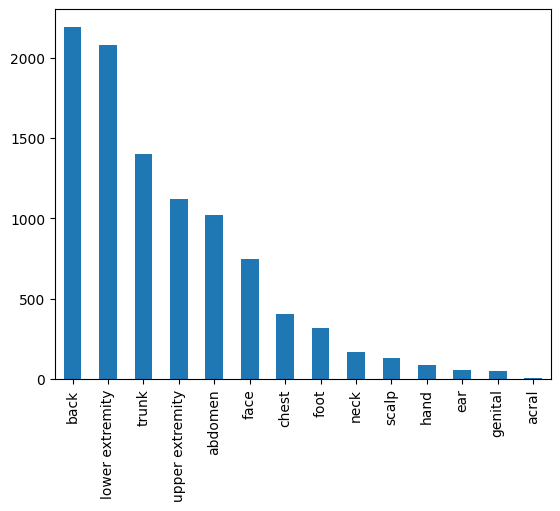

In [15]:
## area
imputedData.localization.value_counts().plot(kind='bar')     ## note that plt matches orig
plt.show()

### Changing data types

In [16]:
imputedData["sex"] = imputedData["sex"].astype("category")
imputedData["localization"] = imputedData["localization"].astype("category")
imputedData["dx"] = imputedData["dx"].astype("category")     
imputedData["dx_type"] = imputedData["dx_type"].astype("category")

### Save data frame as csv

In [22]:
imputedData.to_csv("processedData.csv", encoding='utf-8', index=False)